In [1]:
# ! mkdir datasets
# ! kaggle datasets download abhishek/aaamlp -p datasets

# Cross Validation
What is cross validation?
> cross-validation is a step in the process of building a machine learning model which helps us ensure that our models fit the data accurately and also ensures that we do not overfit

Consider to address a classification problem using just **hold-out** validation

1. Load the data

In [2]:
import pandas as pd
from pathlib import Path
from zipfile import ZipFile

zip_file = ZipFile(Path('.')/'datasets'/'aaamlp.zip')
df = pd.read_csv(zip_file.open('winequality-red.csv'))

In [3]:
df.shape

(1599, 12)

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


The `quality` column is the target.

<AxesSubplot:xlabel='quality', ylabel='count'>

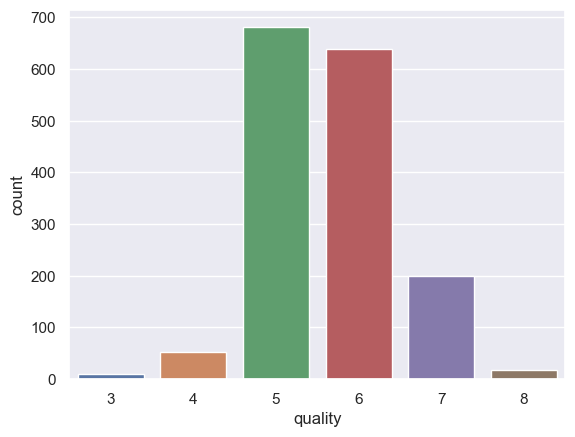

In [30]:
import seaborn as sns

sns.set_theme()

df_to_plot = df.quality.value_counts()
df_to_plot.name = 'count'
df_to_plot.index.name = 'quality'
df_to_plot = df_to_plot.to_frame().reset_index()

sns.barplot(df_to_plot, x='quality', y='count')

2. Split the data

In [6]:
from sklearn.model_selection import train_test_split

y = df['quality']
X = df.drop('quality',axis=1)

X_train,X_test,y_train,y_test = train_test_split(X,y,shuffle=True)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1199, 11), (400, 11), (1199,), (400,))

3. Define the model

In [7]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier()

4. Fit

In [8]:
classifier.fit(X_train,y_train)

DecisionTreeClassifier()

5. Predict

In [9]:
y_pred = classifier.predict(X_test)

6. Evaluate: check the accuracy on the train set and on the test set

In [10]:
from sklearn.metrics import accuracy_score

print(accuracy_score(classifier.predict(X_train),y_train))
print(accuracy_score(y_test,y_pred))

1.0
0.62


The model is clearly overfitting. This issue becomes even more visible if different maximum depths (`max_depth`) parameters for the `DecisionTreeClassifier` are set

100%|██████████| 20/20 [00:00<00:00, 82.31it/s]


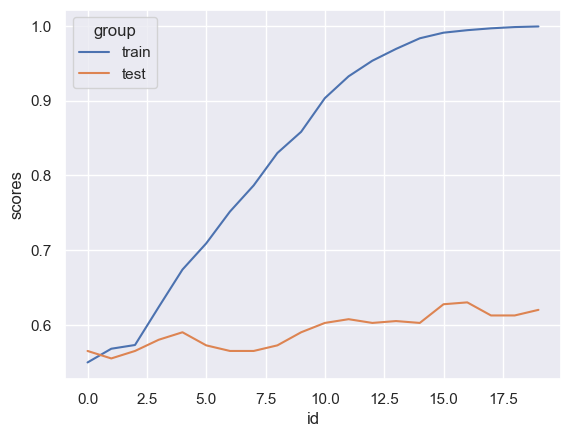

In [31]:
from tqdm import tqdm

scores = {
    'train': [],
    'test': []
}

for max_depth in tqdm(range(1,21)):
    classifier = DecisionTreeClassifier(max_depth=max_depth)
    classifier.fit(X_train,y_train)
    scores['train'].append(classifier.score(X_train,y_train))
    scores['test'].append(classifier.score(X_test,y_test))

score_df = pd.DataFrame(scores).stack()
score_df.name = 'scores'
score_df.index.names = ['id','group']
score_df = score_df.reset_index()
# score_df
with sns.plotting_context('notebook'):
    sns.lineplot(score_df,x='id',y='scores',hue='group')


The test set accuracy does not improve, while the train set accuracy almost becomes equal to 1